In this Data Project we will be looking at data from the 2012 election in the USA.

In this project we will analyze two datasets. The first data set will be the results of political polls.

We will analyze this aggregated poll data and answer some questions:

1.Who was being polled and what was their party affiliation?

2.Did the poll results favor Romney or Obama?

3.How do undecided voters effect the poll?

4.Can we account for the undecided voters?

5.How did voter sentiment change over time?

6.Can we see an effect in the polls from the debates?

In [0]:
# Initial imports

# For data manipulation
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

# For division precision
from __future__ import division



In [0]:

# For importing data from the Web
import requests
from io import StringIO

In [0]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Get the data from the Web
source = requests.get(url).text

# Read and parse the data from the memory
poll_data = StringIO(source)

# Load the parsed data into a dataframe
poll_df = pd.read_csv(poll_data)


In [10]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [11]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, "Pollsters' Affiliation During 2012 USA Presidential Elections")

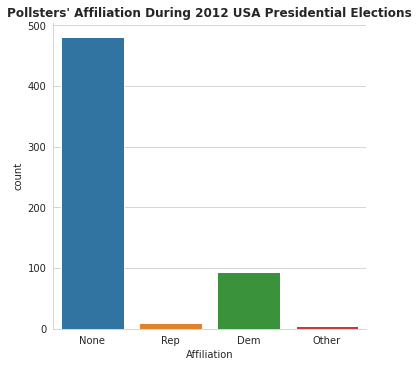

In [13]:
# Quick view of affiliations
sns.factorplot('Affiliation', data = poll_df, kind = 'count')
plt.title("Pollsters' Affiliation During 2012 USA Presidential Elections", weight = "bold")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


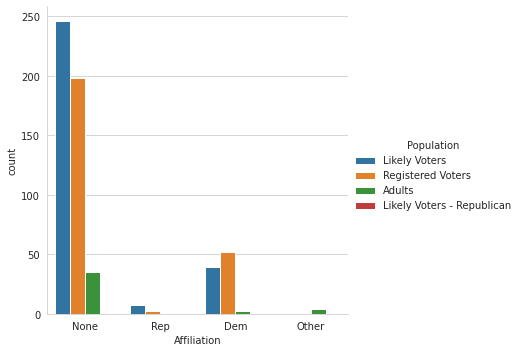

In [14]:
sns.factorplot('Affiliation', data = poll_df, kind = 'count', hue = 'Population')

In [0]:
# Analysis of average votes per candidate

# Get the average of all numeric columns of poll_df
avg = DataFrame(poll_df.mean())

# We drop the 'Number of Observations' columns since it's meanless for this analysis
avg.drop('Number of Observations', axis = 0, inplace = True)

In [16]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [0]:
# Now get the standar deviations
std = DataFrame(poll_df.std())
std.drop('Number of Observations', axis = 0, inplace = True)

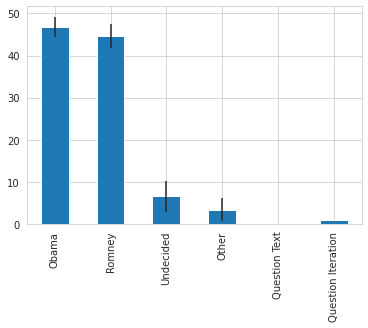

In [18]:
avg.plot(yerr = std, kind = 'bar', legend = False)

In [0]:
# Now we will create a new dataframe for further analysis of voting results
poll_avg = pd.concat([avg, std], axis = 1)

# Change columns names
poll_avg.columns = ['Average', 'STD']

In [20]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


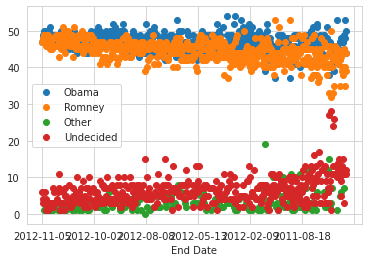

In [21]:
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney', 'Other', 'Undecided'], linestyle = '', marker = 'o')

In [0]:
# Now we will analyse the differences between Obama and Romney voting preferences.

# We add a new column to analyse the diffence of voting preference across all the pollsters.
# A positive difference will mean a preference for Obama, a negative difference will mean a preference for Romney.
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [0]:
# Now we will group our dataframe by start date
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

In [24]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


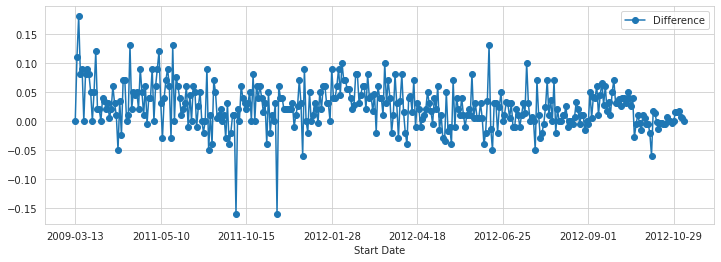

In [25]:
# Plot voting preference, remember:
#    A positive difference will mean a preference for Obama.
#    A negative difference will mean a preference for Romney.
poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-')

In [0]:
# Now we will make an analysis of October 2012

# We get the row indexes for all the rows that belongs to october
xlimit = [row_index for row_index in poll_df.index if poll_df['Start Date'][row_index][0:7] == '2012-10']

In [28]:
print (min(xlimit)) # First row of october
print (max(xlimit)) # Last row of october

325
352


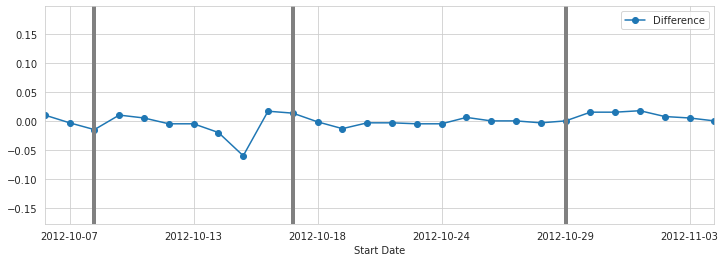

In [29]:
# Now we plot all the data from october
poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-', xlim = (329, 356))

# Now we will add vertical lines on the debate's dates to have tendency markers

# Oct 3rd
plt.axvline(x = 329 + 2, linewidth = 4, color = 'grey')
# Oct 11th
plt.axvline(x = 329 + 10, linewidth = 4, color = 'grey')
# Oct 22nd
plt.axvline(x = 329 + 21, linewidth = 4, color = 'grey')